## Checking my model with the 6D data from Carlin 2018

In [21]:
from galpy.orbit import Orbit
from galpy.potential import MWPotential2014
from galpy.util import conversion
import numpy as np
import matplotlib.pyplot as plt

In [22]:
## Expected results:
plow, alow = 12.6, 193
phigh, ahigh = 10.6, 88.9

In [23]:
# sixD = [ra, dec, dist, pmra, pmdec, rvel]
to = conversion.time_in_Gyr(ro = 8., vo = 220.)

# Note, can't find explicit RA & Dec for this paper?
# Includes a table for each star, but not the one used for orbit calc. - avg maybe?
sixD = [209.3, 26.8, 46.5, -1.14, -0.98, 197.5]

o = Orbit(sixD, ro=8., vo=220., radec=True)

In [24]:
deltb = np.linspace(0, -5/to, 1000)
deltf = np.linspace(0, 5/to, 1000)

obwd = o()
ofwd = o()
obwd.integrate(deltb, MWPotential2014)
ofwd.integrate(deltf, MWPotential2014)

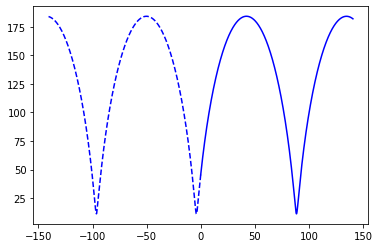

In [25]:
plt.plot(deltb, obwd.r(deltb), 'b--')
plt.plot(deltf, ofwd.r(deltf), 'b-')

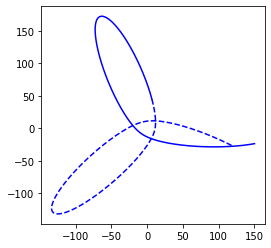

In [27]:
fig = plt.figure(figsize = (4,4))

plt.plot(obwd.y(deltb[:800]), obwd.z(deltb[:800]),'b--')
plt.plot(ofwd.y(deltf[:800]), ofwd.z(deltf[:800]), 'b-')

In [33]:
print('pericentre', obwd.rperi())
print('apocentre', obwd.rap())


pericentre 11.059934577773014
apocentre 184.34096597384612
